In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [14]:
file_name = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(file_name)
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [16]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [18]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [20]:
df.replace("?" , np.nan , inplace = True ) 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [36]:
is_smoker = df["smoker"].value_counts().idxmax() 
df["smoker"].replace(np.nan,is_smoker,inplace = True)

In [42]:
age_mean = df["age"].astype("float").mean()
df["age"].replace(np.nan , age_mean , inplace = True) 

In [52]:
df[["age","smoker"]]=df[["age","smoker"]].astype("int") 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


In [56]:
df["charges"] = np.around(df["charges"] , 2)

In [58]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


### Veri görselleştirme

(0.0, 66902.85800000001)

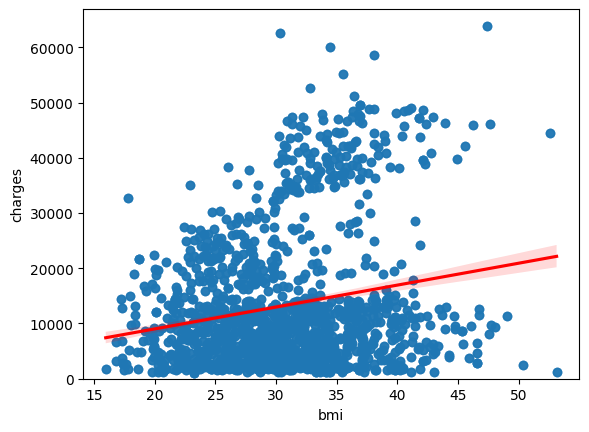

In [67]:
sns.regplot(x = "bmi" , y = "charges" , data = df , line_kws = {"color" : "red" })
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

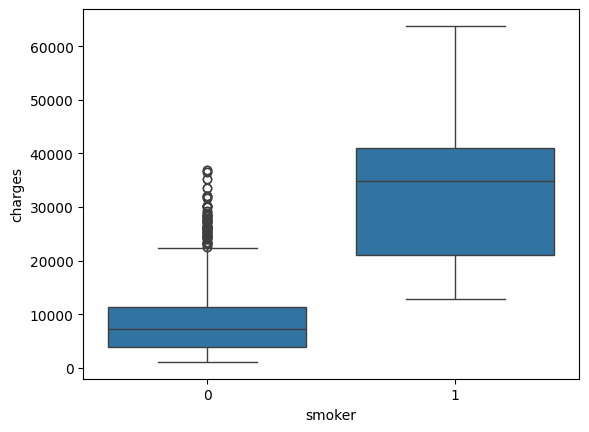

In [69]:
sns.boxplot(x= "smoker" , y= "charges", data = df)

In [73]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


# Model oluşturma olayı

In [76]:
X = df[["smoker"]]
Y = df["charges"]

In [78]:
lm = LinearRegression() 
lm.fit(X,Y)
print(lm.score(X ,Y))

0.6227430402464125


In [82]:
Z = df[["age","gender","bmi","no_of_children","smoker","region","charges"]]
lm.fit(Z,Y)
print(lm.score(Z,Y))

1.0


# Pipeline

In [97]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())] 

In [101]:
pipe = Pipeline(Input)
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [105]:
ypipe = pipe.predict(Z)

In [109]:
print(r2_score(Y,ypipe))

NameError: name 'r2_score' is not defined